<a href="https://colab.research.google.com/github/elbulm/datawagonsugoma/blob/main/Hackathon_sugoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Образец результата

прогноз на апрель - август 2023, сделанный на данных до марта включительно



░█████╗░███╗░░░███╗░█████╗░███╗░░██╗░██████╗░  ██╗░░░██╗░██████╗

██╔══██╗████╗░████║██╔══██╗████╗░██║██╔════╝░  ██║░░░██║██╔════╝

███████║██╔████╔██║██║░░██║██╔██╗██║██║░░██╗░  ██║░░░██║╚█████╗░

██╔══██║██║╚██╔╝██║██║░░██║██║╚████║██║░░╚██╗  ██║░░░██║░╚═══██╗

██║░░██║██║░╚═╝░██║╚█████╔╝██║░╚███║╚██████╔╝  ╚██████╔╝██████╔╝

╚═╝░░╚═╝╚═╝░░░░░╚═╝░╚════╝░╚═╝░░╚══╝░╚═════╝░  ░╚═════╝░╚═════╝░


In [ ]:
# Относительные ссылки, включая импорты, относительно корневой папки проекта
import os
os.chdir(os.path.dirname(os.getcwd()))

import pandas as pd
import numpy as np


In [ ]:
station_mapping_file = "/home/owner/Documents/DEV/DATA_WAGON/data/hackaton/station_mapping.csv" #"./data/hackaton/station_mapping.csv"

station_mapping = pd.read_csv(
        station_mapping_file,
        sep=";",
        decimal=",",
        encoding="windows-1251",
)
station_mapping

,station_id,department_name,railway_name
0,0,0,0
1,1,107,25
2,2,107,25
3,3,164,38
4,4,81,17
...,...,...,...
39119,39119,135,6
39120,39120,135,6
39121,39121,135,6
39122,39122,135,6


In [ ]:
freight_mapping_file = "/home/owner/Documents/DEV/DATA_WAGON/data/hackaton/freight_mapping.csv"
freight_mapping = pd.read_csv(
        freight_mapping_file,
        sep=";",
        decimal=",",
        encoding="windows-1251",
)
freight_mapping

,freight_id,freight_group_name
0,0,0
1,1,14
2,2,5
3,3,5
4,4,5
...,...,...
5091,5091,34
5092,5092,34
5093,5093,34
5094,5094,34


In [ ]:
client_mapping_file = "/home/owner/Documents/DEV/DATA_WAGON/data/hackaton/client_mapping.csv"
client_mapping = pd.read_csv(
        client_mapping_file,
        sep=";",
        decimal=",",
        encoding="windows-1251",
)
client_mapping

,client_sap_id,holding_name
0,0,330
1,1,1319
2,2,896
3,3,395
4,4,1629
...,...,...
2413,2413,112
2414,2414,1290
2415,2415,2046
2416,2416,1935


In [ ]:
fact_train_test_file = "/home/owner/Documents/DEV/DATA_WAGON/data/hackaton/fact_train_test.csv"
fact_train_test = pd.read_csv(
        fact_train_test_file,
        sep=";",
        decimal=",",
        encoding="windows-1251",
)
fact_train_test

,period,rps,podrod,filial,client_sap_id,freight_id,sender_station_id,recipient_station_id,sender_organisation_id,real_weight,real_wagon_count
0,2012-07-01,1,5,1,328,1193,30252,13005,10036,71.0,1
1,2012-10-01,1,5,1,328,1193,30252,11376,10036,210.0,3
2,2014-03-01,0,1,1,328,3472,30252,29548,10036,67.0,1
3,2014-03-01,0,1,1,328,3472,30252,29158,10036,67.0,1
4,2014-03-01,0,2,1,328,3472,30252,27484,10036,66.0,1
...,...,...,...,...,...,...,...,...,...,...,...
3559227,2023-03-01,1,5,2,1346,1482,31438,31482,0,69.0,1
3559228,2023-03-01,1,5,2,1346,1492,31438,36091,27275,70.0,1
3559229,2023-03-01,1,5,2,1346,1492,31438,35450,27275,70.0,1
3559230,2023-03-01,1,5,2,1346,1492,31438,31482,0,207.0,3


In [ ]:
fact_train_test_weight = fact_train_test.loc[fact_train_test['real_weight']>=0]
print(fact_train_test_weight.loc[fact_train_test_weight['real_weight']<0, ['period', 'real_weight']])

Empty DataFrame
Columns: [period, real_weight]
Index: []


In [ ]:
fact_train_test = pd.merge(fact_train_test, client_mapping, how="left", on="client_sap_id")
fact_train_test = pd.merge(fact_train_test, freight_mapping, how="left", on="freight_id")
fact_train_test = pd.merge(fact_train_test, station_mapping.add_prefix("sender_"), how="left", on="sender_station_id")
fact_train_test = pd.merge(fact_train_test, station_mapping.add_prefix("recipient_"), how="left", on="recipient_station_id")
fact_train_test

,period,rps,podrod,filial,client_sap_id,freight_id,sender_station_id,recipient_station_id,sender_organisation_id,real_weight,real_wagon_count,holding_name,freight_group_name,sender_department_name,sender_railway_name,recipient_department_name,recipient_railway_name
0,2012-07-01,1,5,1,328,1193,30252,13005,10036,71.0,1,1423.0,21,153,12,75,4
1,2012-10-01,1,5,1,328,1193,30252,11376,10036,210.0,3,1423.0,21,153,12,99,23
2,2014-03-01,0,1,1,328,3472,30252,29548,10036,67.0,1,1423.0,30,153,12,16,11
3,2014-03-01,0,1,1,328,3472,30252,29158,10036,67.0,1,1423.0,30,153,12,118,11
4,2014-03-01,0,2,1,328,3472,30252,27484,10036,66.0,1,1423.0,30,153,12,94,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559227,2023-03-01,1,5,2,1346,1482,31438,31482,0,69.0,1,2226.0,22,73,14,143,35
3559228,2023-03-01,1,5,2,1346,1492,31438,36091,27275,70.0,1,2226.0,22,73,14,79,10
3559229,2023-03-01,1,5,2,1346,1492,31438,35450,27275,70.0,1,2226.0,22,73,14,104,10
3559230,2023-03-01,1,5,2,1346,1492,31438,31482,0,207.0,3,2226.0,22,73,14,143,35


In [ ]:
fact_train_test.to_csv("/home/owner/Documents/DEV/DATA_WAGON/data/hackaton/fact_train_test_merge.csv", sep=',', index=False, encoding='utf-8')

In [ ]:
fact_train_test['month'] = pd.to_datetime(fact_train_test['period']).dt.month
fact_train_test['year'] = pd.to_datetime(fact_train_test['period']).dt.year
fact_train_test

,period,rps,podrod,filial,client_sap_id,freight_id,sender_station_id,recipient_station_id,sender_organisation_id,real_weight,real_wagon_count,holding_name,freight_group_name,sender_department_name,sender_railway_name,recipient_department_name,recipient_railway_name,month,year
0,2012-07-01,1,5,1,328,1193,30252,13005,10036,71.0,1,1423.0,21,153,12,75,4,7,2012
1,2012-10-01,1,5,1,328,1193,30252,11376,10036,210.0,3,1423.0,21,153,12,99,23,10,2012
2,2014-03-01,0,1,1,328,3472,30252,29548,10036,67.0,1,1423.0,30,153,12,16,11,3,2014
3,2014-03-01,0,1,1,328,3472,30252,29158,10036,67.0,1,1423.0,30,153,12,118,11,3,2014
4,2014-03-01,0,2,1,328,3472,30252,27484,10036,66.0,1,1423.0,30,153,12,94,39,3,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559227,2023-03-01,1,5,2,1346,1482,31438,31482,0,69.0,1,2226.0,22,73,14,143,35,3,2023
3559228,2023-03-01,1,5,2,1346,1492,31438,36091,27275,70.0,1,2226.0,22,73,14,79,10,3,2023
3559229,2023-03-01,1,5,2,1346,1492,31438,35450,27275,70.0,1,2226.0,22,73,14,104,10,3,2023
3559230,2023-03-01,1,5,2,1346,1492,31438,31482,0,207.0,3,2226.0,22,73,14,143,35,3,2023


In [ ]:
class RK():
    def __init__(self):
        self.__rk = -1
    def __call__(self, x):
        if(not x): self.__rk += 1
        return self.__rk

def create_rank_of_group_by_sorted_parameter(df_orig : pd.DataFrame, group_name : str, parameter_name : str) -> pd.DataFrame:
    rk = RK()

    df_rank_org = df_orig[[group_name, parameter_name]].groupby(group_name).mean().sort_values(by=parameter_name)
    df_rank_org['match'] = df_rank_org[parameter_name].eq(df_rank_org[parameter_name].shift(1))
    df_rank_org['rank_of_' + group_name + '_by_' + parameter_name] = df_rank_org['match'].apply(rk)
    df_rank_org.drop(columns = ['match', parameter_name], axis = 'columns', inplace=True)
    return df_orig.merge(df_rank_org, how = 'left', on = group_name)

# create_id_of_group_by_sorted_parameter(fact_train_test, 'freight_group_name', 'real_weight')

In [ ]:
fact_train_test['recipient_department_name'].max()

171

In [ ]:
def add_master_data_mappings(df: pd.DataFrame) -> pd.DataFrame:
    # = Пути к справочникам - откорректировать если в реальной системе будут лежать по другому адресу =
    client_mapping_file = "/home/owner/Documents/DEV/DATA_WAGON/data/hackaton/client_mapping.csv"#"./data/hackaton/client_mapping.csv"
    freight_mapping_file = "/home/owner/Documents/DEV/DATA_WAGON/data/hackaton/freight_mapping.csv" #"./data/hackaton/freight_mapping.csv"
    station_mapping_file = "/home/owner/Documents/DEV/DATA_WAGON/data/hackaton/station_mapping.csv" #"./data/hackaton/station_mapping.csv"

    # Клиент - холдинг
    client_mapping = pd.read_csv(
        client_mapping_file,
        sep=";",
        decimal=",",
        encoding="windows-1251",
    )
    df = pd.merge(df, client_mapping, how="left", on="client_sap_id")

    # Груз
    freight_mapping = pd.read_csv(
        freight_mapping_file, sep=";", decimal=",", encoding="windows-1251"
    )
    df = pd.merge(df, freight_mapping, how="left", on="freight_id")

    # Станции
    station_mapping = pd.read_csv(
        station_mapping_file,
        sep=";",
        decimal=",",
        encoding="windows-1251",
    )
    df = pd.merge(
        df,
        station_mapping.add_prefix("sender_"),
        how="left",
        on="sender_station_id",
    )
    df = pd.merge(
        df,
        station_mapping.add_prefix("recipient_"),
        how="left",
        on="recipient_station_id",
    )

    return df


def evaluate(fact: pd.DataFrame, forecast: pd.DataFrame, public: bool = True) -> float:
    # = Параметры для расчета метрики =
    accuracy_granularity = [
        "period",
        "rps",
        "holding_name",
        "sender_department_name",
        "recipient_department_name",
    ]
    fact_value, forecast_value = "real_wagon_count", "forecast_wagon_count"
    if public:
        metric_weight = np.array([0.0, 1.0, 0.0, 0.0, 0.0])
    else:
        metric_weight = np.array([0.1, 0.6, 0.1, 0.1, 0.1])

    # = Собственно расчет метрик =
    # 1. Добавляем сущности верхних уровней гранулярности по справочникам
    fact = add_master_data_mappings(fact)
    forecast = add_master_data_mappings(forecast)

    # 2. Расчет KPI
    compare_data = pd.merge(
        fact.groupby(accuracy_granularity, as_index=False)[fact_value].sum(),
        forecast.groupby(accuracy_granularity, as_index=False)[forecast_value].sum(),
        how="outer",
        on=accuracy_granularity,
    ).fillna(0)
    # Против самых хитрых - нецелочисленный прогноз вагоноотправок не принимаем
    compare_data[fact_value] = np.around(compare_data[fact_value]).astype(int)
    compare_data[forecast_value] = np.around(compare_data[forecast_value]).astype(int)

    # 3. Рассчитаем метрики для каждого месяца в выборке
    compare_data["ABS_ERR"] = abs(
        compare_data[forecast_value] - compare_data[fact_value]
    )
    compare_data["MAX"] = abs(compare_data[[forecast_value, fact_value]].max(axis=1))
    summary = compare_data.groupby(by="period")[
        [forecast_value, fact_value, "ABS_ERR", "MAX"]
    ].sum()
    summary["Forecast Accuracy"] = 1 - summary["ABS_ERR"] / summary["MAX"]

    # 4. Взвесим метрики отдельных месяцев для получения одной цифры score
    score = (
        summary["Forecast Accuracy"].sort_index(ascending=True) * metric_weight
    ).sum()

    return score


def calc_score_public(fact: pd.DataFrame, forecast: pd.DataFrame) -> float:
    return evaluate(fact, forecast, public=True)


def calc_score_private(fact: pd.DataFrame, forecast: pd.DataFrame) -> float:
    return evaluate(fact, forecast, public=False)



In [ ]:
os.getcwd()

'/home/owner/Documents/DEV'

# Визуал


⣿⣿⣿⣿⣿⣿⣿⣿⠟⠋⠁⠄⠄⠄⠄⠄⠄⠄⠄⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿

⣿⣿⣿⣿⣿⣿⡟⠁⠄⠄⠄⠄⣠⣤⣴⣶⣶⣶⣶⣤⡀⠈⠙⢿⣿⣿⣿⣿⣿

⣿⣿⣿⣿⣿⡟⠄⠄⠄⠄⠄⣸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣆⠄⠈⣿⣿⣿⣿⣿

⣿⣿⣿⣿⣿⠁⠄⠄⠄⢀⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠄⠄⢺⣿⣿⣿⣿

⣿⣿⣿⣿⣿⡄⠄⠄⠄⠙⠻⠿⣿⣿⣿⣿⠿⠿⠛⠛⠻⣿⡄⠄⣾⣿⣿⣿⣿

⣿⣿⣿⣿⣿⡇⠄⠄⠁ 👁 ⠄⢹⣿⡗⠄ 👁 ⢄⡀⣾⢀⣿⣿⣿⣿⣿⣿

⣿⣿⣿⣿⣿⡇⠘⠄⠄⠄⢀⡀⠄⣿⣿⣷⣤⣤⣾⣿⣿⣿⣧⢸⣿⣿⣿⣿⣿

⣿⣿⣿⣿⣿⡇⠄⣰⣿⡿⠟⠃⠄⣿⣿⣿⣿⣿⡛⠿⢿⣿⣷⣾⣿⣿⣿⣿⣿

⣿⣿⣿⣿⣿⣿⡄⠈⠁⠄⠄⠄⠄⠻⠿⢛⣿⣿⠿⠂⠄⢹⢹⣿⣿⣿⣿⣿⣿

⣿⣿⣿⣿⣿⣿⣿⡐⠐⠄⠄⣠⣀⣀⣚⣯⣵⣶⠆⣰⠄⠞⣾⣿⣿⣿⣿⣿⣿

⣿⣿⣿⣿⣿⣿⣿⣷⡄⠄⠄⠈⠛⠿⠿⠿⣻⡏⢠⣿⣎⣾⣿⣿⣿⣿⣿⣿⣿

⣿⣿⣿⣿⣿⣿⡿⠟⠛⠄⠄⠄⠄⠙⣛⣿⣿⣵⣿⡿⢹⡟⣿⣿⣿⣿⣿⣿⣿

⣿⠿⠿⠋⠉⠄⠄⠄⠄⠄⠄⠄⣀⣠⣾⣿⣿⣿⡟⠁⠹⡇⣸⣿⣿⣿⣿⣿⣿

⠁⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠙⠿⠿⠛⠋⠄⣸⣦⣠⣿⣿⣿⣿⣿⣿⣿

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

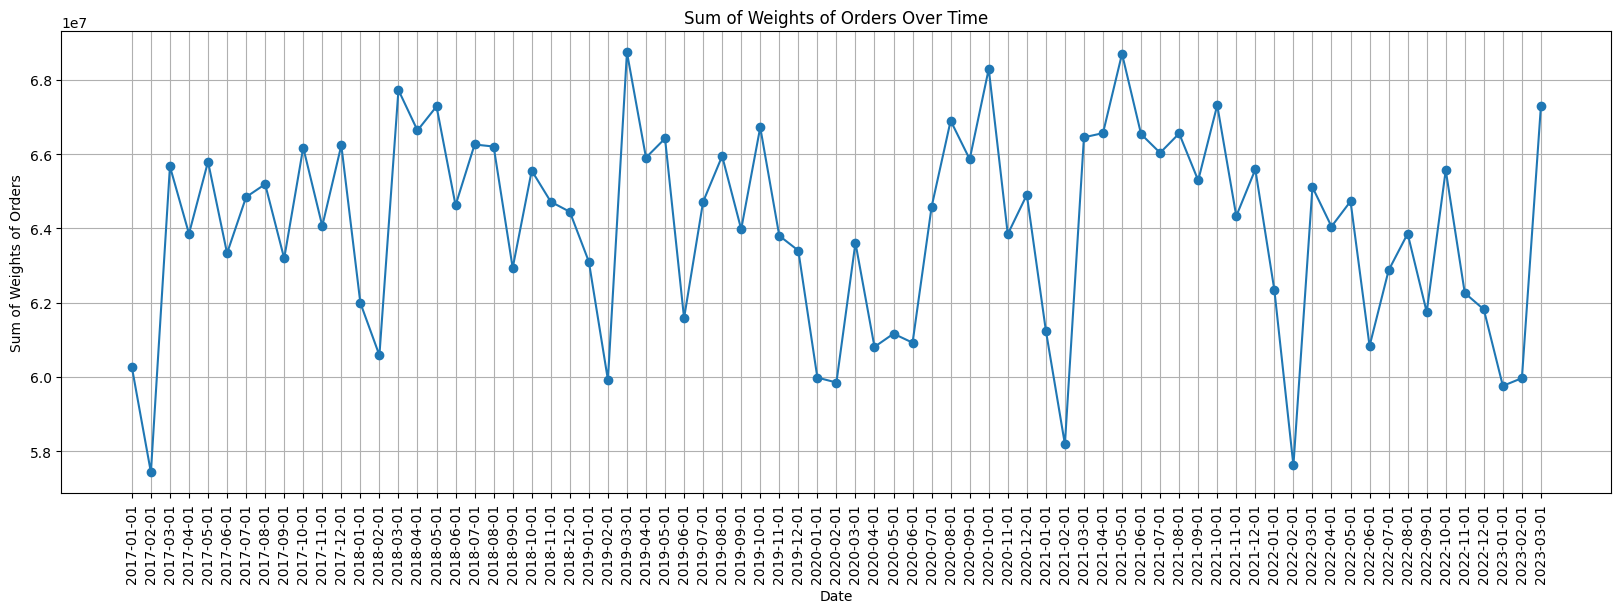

In [ ]:
measured_df = fact_train_test.loc[fact_train_test['year']>= 2017]
sum_weight = measured_df.groupby('period')['real_weight'].sum()

plt.figure(figsize=(20, 6))
plt.plot(sum_weight.index, sum_weight.values, marker='o', linestyle='-')
plt.title('Sum of Weights of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Sum of Weights of Orders')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

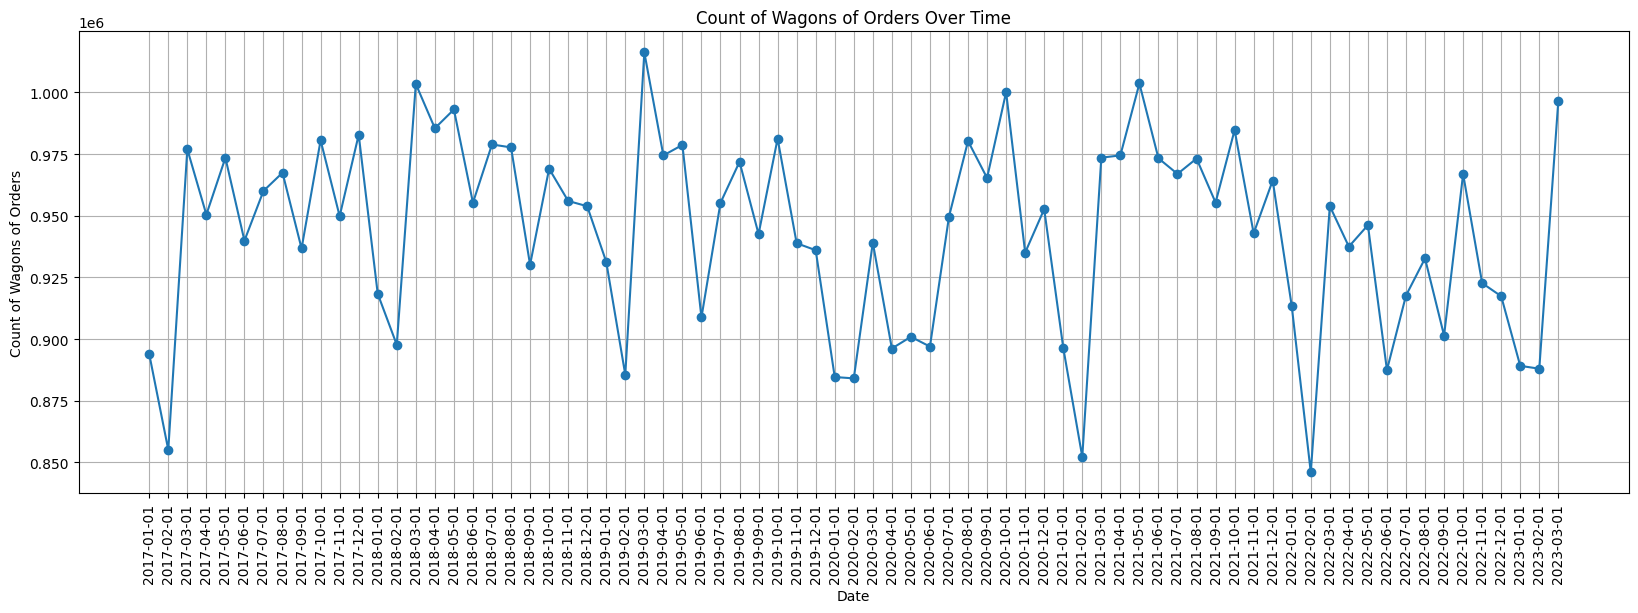

In [ ]:
measured_df = fact_train_test.loc[fact_train_test['year']>= 2017]
sum_weight = measured_df.groupby('period')['real_wagon_count'].sum()

plt.figure(figsize=(20, 6))
plt.plot(sum_weight.index, sum_weight.values, marker='o', linestyle='-')
plt.title('Count of Wagons of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Wagons of Orders')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

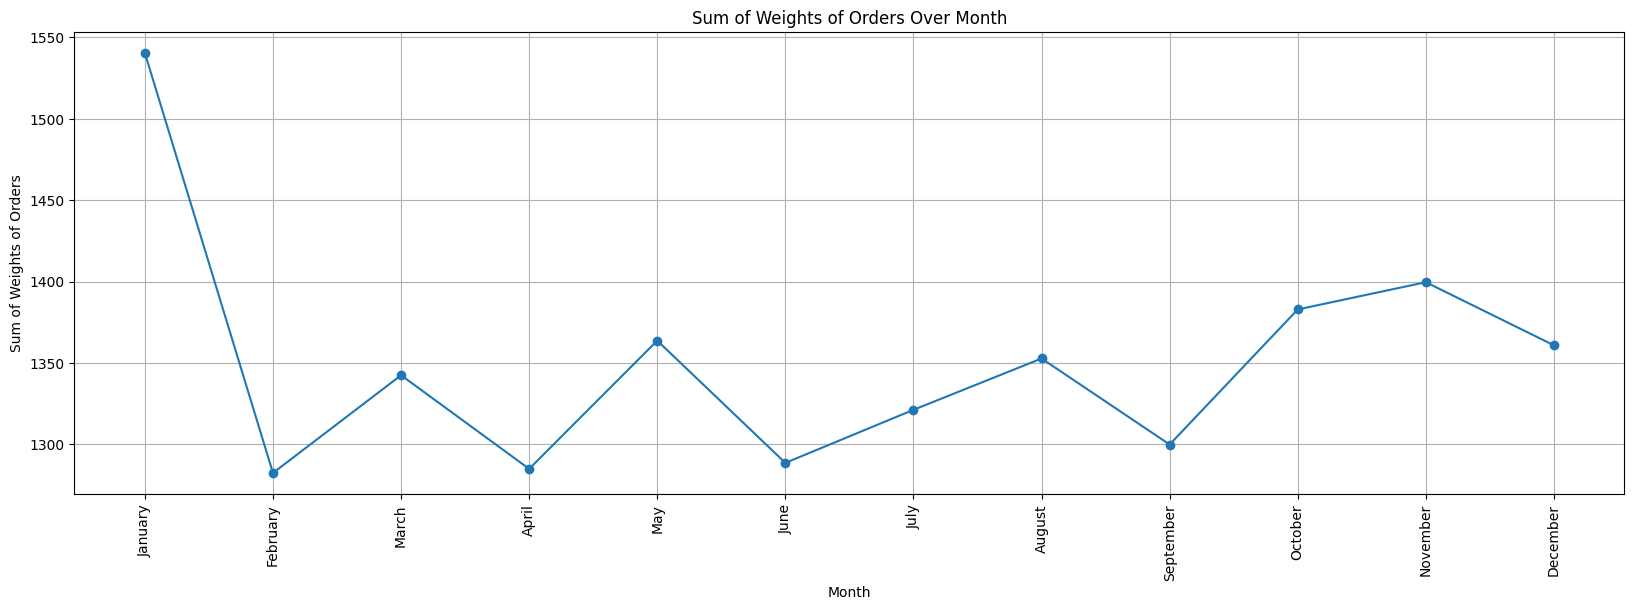

In [ ]:
import calendar

sum_weight = fact_train_test.groupby('month')['real_weight'].mean()
sum_weight.index = sum_weight.index.map(lambda x: calendar.month_name[x])

plt.figure(figsize=(20, 6))
plt.plot(sum_weight.index, sum_weight.values, marker='o', linestyle='-')
plt.title('Sum of Weights of Orders Over Month')
plt.xlabel('Month')
plt.ylabel('Sum of Weights of Orders')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

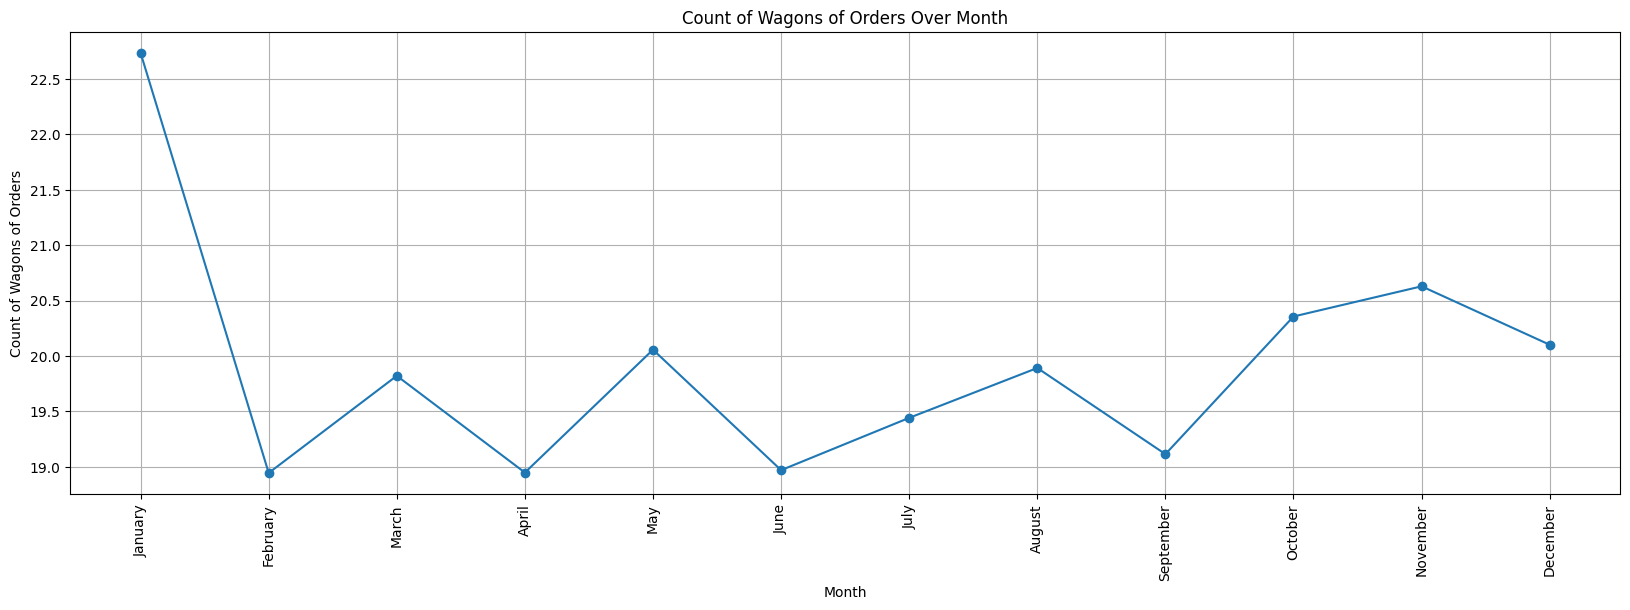

In [ ]:
import calendar

sum_weight = fact_train_test.groupby('month')['real_wagon_count'].mean()
sum_weight.index = sum_weight.index.map(lambda x: calendar.month_name[x])

plt.figure(figsize=(20, 6))
plt.plot(sum_weight.index, sum_weight.values, marker='o', linestyle='-')
plt.title('Count of Wagons of Orders Over Month')
plt.xlabel('Month')
plt.ylabel('Count of Wagons of Orders')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
measured_df = fact_train_test[['real_wagon_count', 'real_weight', 'rps', 'year', 'month']]
measured_df.corr()

,real_wagon_count,real_weight,rps,year,month
real_wagon_count,1.000000,0.997485,0.110028,0.005858,-0.000660
real_weight,0.997485,1.000000,0.108414,0.006232,-0.000550
rps,0.110028,0.108414,1.000000,0.038885,-0.006464
year,0.005858,0.006232,0.038885,1.000000,-0.084136
month,-0.000660,-0.000550,-0.006464,-0.084136,1.000000


In [ ]:
!pip install seaborn

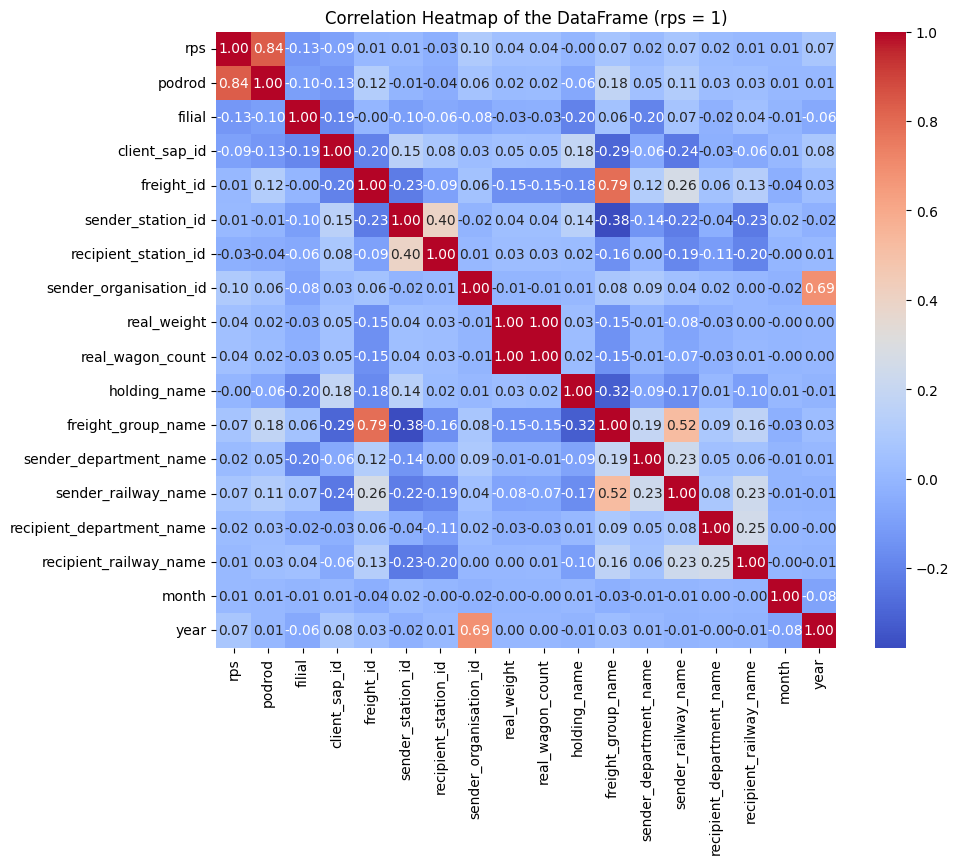

In [ ]:
import seaborn as sns
rps1_freq_freight_ids = set([726, 728, 729, 734, 735, 1063, 718, 623, 1636, 1152, 721, 1059, 3194, 625, 680, 1111, 1117, 730, 731, 1530, 1634, 1610, 1632, 617, 630, 1703, 739, 732, 747, 645, 685, 681, 627, 1529, 723, 1631, 1161, 2342, 1193, 737, 1819, 0, 1507, 648, 1698, 1612, 1028, 1208, 916, 733, 2357])
correlation_matrix = fact_train_test[[fid in rps1_freq_freight_ids for fid in fact_train_test['freight_id']]].loc[:, fact_train_test.columns != 'period'].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of the DataFrame (rps = 1)')
plt.show()

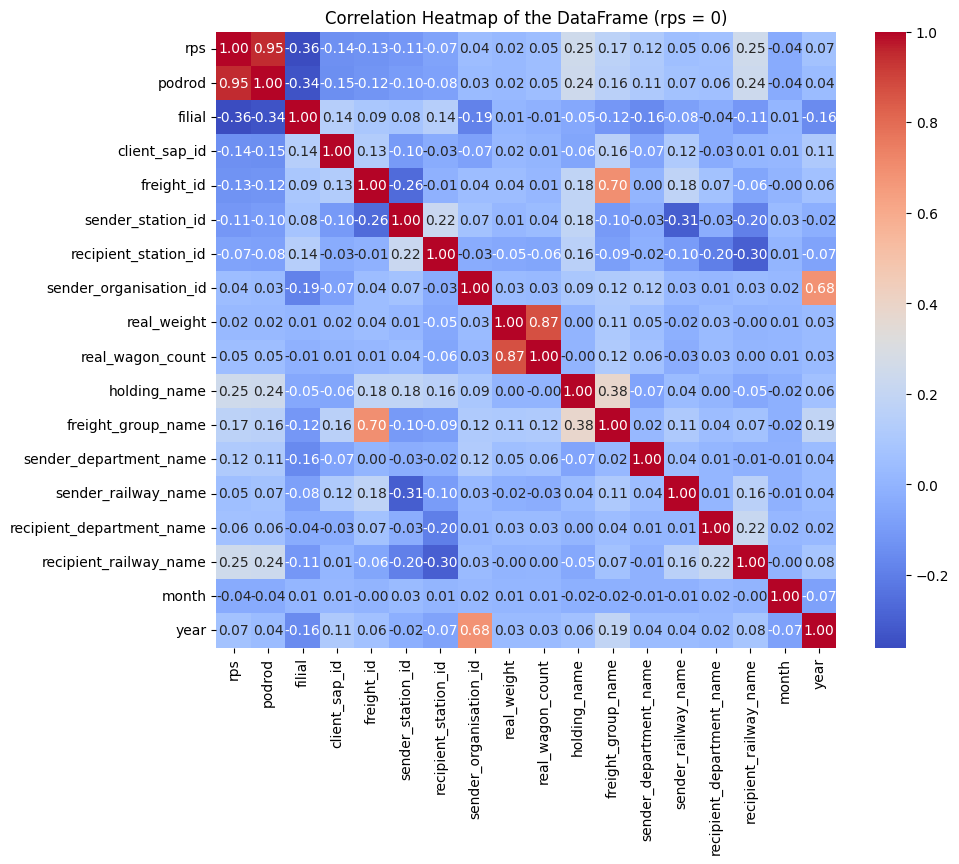

In [ ]:
rps0_freq_freight_ids = set([1714, 1192, 543, 0, 1602, 3, 2357, 4297, 349, 2578, 6, 3356, 40, 78, 16, 5000, 4232, 5060])
correlation_matrix = fact_train_test[[fid in rps0_freq_freight_ids for fid in fact_train_test['freight_id']]].loc[:, fact_train_test.columns != 'period'].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of the DataFrame (rps = 0)')
plt.show()

https://habr.com/ru/articles/544666/

https://hackernoon.com/the-concept-behind-mean-target-encoding-in-ai-and-ml

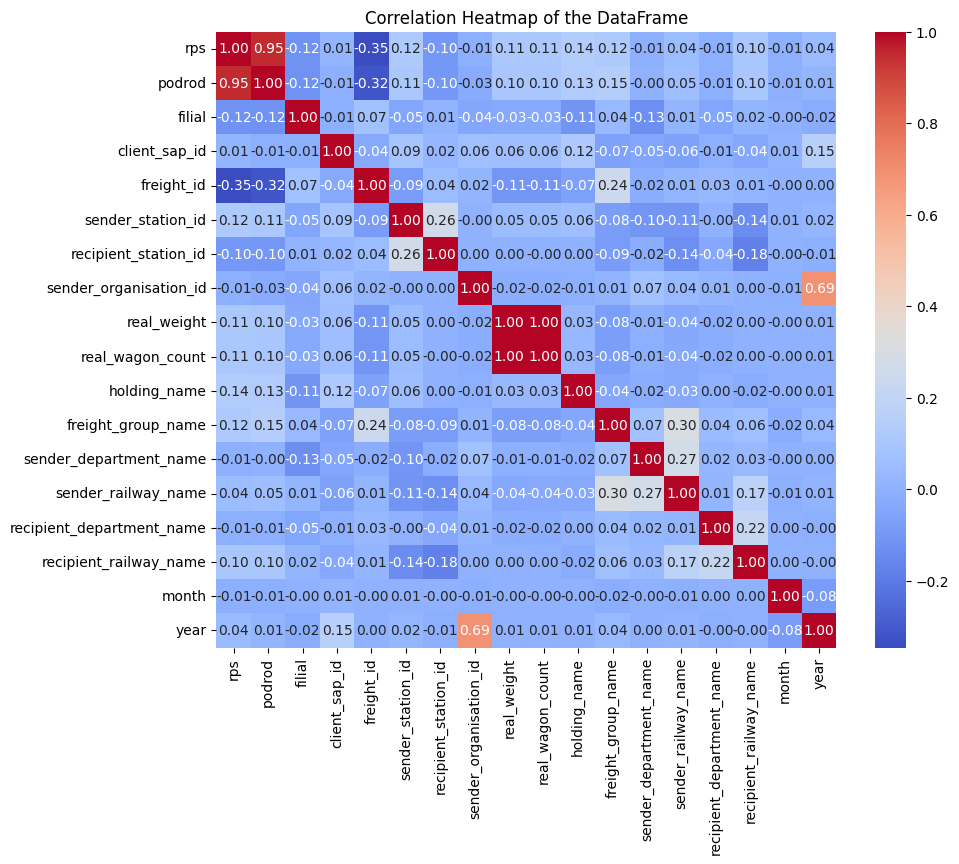

In [ ]:
import seaborn as sns

correlation_matrix = fact_train_test.loc[:, fact_train_test.columns != 'period'].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of the DataFrame')
plt.show()

# Тестики

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sma
import statsmodels as sm
import statsmodels.tsa.stattools as st

**Check for stationarity**

In [ ]:
# decomposition = sm.tsa.seasonal_decompose(fact_train_test.groupby('year')['real_weight'].sum(), period=2)
# fig = decomposition.plot()
# plt.show()

# test_data = fact_train_test
# test_data['date'] = fact_train_test['year'].to_string() + '-' + fact_train_test['month'].to_string()

# decomposition = sm.tsa.seasonal_decompose(test_data[(test_data['year'] > 2016) & (test_data['year'] < 2023) & (test_data['rps'] == 1)].groupby(['date'])['real_weight'].sum(), period=6)
# fig = decomposition.plot()
# plt.show()

# adf = st.adfuller(x=measured_df['real_weight'], regression="ct", maxlag=12)
# print("adf:", adf[0], "adf_pvalue:", adf[1])

p_value is < 0.05, therefore the time series is **stationary**

adf: -362.6590636937991 adf_pvalue: 0.0


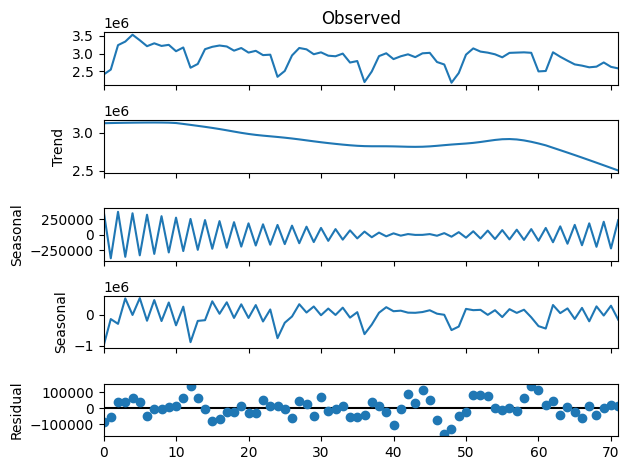

In [ ]:
adf = st.adfuller(x=measured_df['real_wagon_count'], regression="ct", maxlag=12)
print("adf:", adf[0], "adf_pvalue:", adf[1])

rps0_data = fact_train_test[fact_train_test['rps'] == 0]
test_data = rps0_data[(rps0_data['year'] > 2016) & (rps0_data['year'] < 2023)].groupby(['year', 'month'])['real_weight'].sum()

decomposition = sm.tsa.seasonal.MSTL(np.array(test_data), periods=[12, 2], iterate=100).fit()
fig = decomposition.plot()
plt.show()

p_value is < 0.05, therefore the time series is **stationary**

In [ ]:
adf = st.adfuller(x=measured_df['real_wagon_count'].loc[measured_df['rps'] == 0], regression="ct", maxlag=12)
print("adf:", adf[0], "adf_pvalue:", adf[1])

rps1_data = fact_train_test[fact_train_test['rps'] == 1]
test_data = rps1_data[(rps1_data['year'] > 2016) & (rps1_data['year'] < 2023)].groupby(['year', 'month'])['real_weight'].sum()

decomposition = sm.tsa.seasonal.STL(np.array(test_data), period=12).fit()
fig = decomposition.plot()
plt.show()

KeyboardInterrupt: 

In [ ]:
for column in fact_train_test.columns:
    print(column, ": ", len(fact_train_test[column].unique()))

period :  85
rps :  2
podrod :  7
filial :  3
client_sap_id :  2036
freight_id :  2652
sender_station_id :  3256
recipient_station_id :  4684
sender_organisation_id :  33758
real_weight :  50461
real_wagon_count :  3669
holding_name :  1893
freight_group_name :  41
sender_department_name :  135
sender_railway_name :  38
recipient_department_name :  143
recipient_railway_name :  39
month :  12
year :  11


In [ ]:
fact_train_test.drop(labels=['sender_department_name', 'recipient_department_name'], axis = 'columns', inplace=True)


In [ ]:
# fact_train_test['railway_send_rec'] = fact_train_test.sender_railway_name.map(str)+ "-" + fact_train_test.recipient_railway_name.map(str)

In [ ]:
fact_train_test.drop(labels=['sender_railway_name', 'recipient_railway_name'], axis = 'columns', inplace=True)

In [ ]:
for column in fact_train_test.columns:
    print(column, ": ", len(fact_train_test[column].unique()))

period :  85
rps :  2
podrod :  7
filial :  3
client_sap_id :  2036
freight_id :  2652
sender_station_id :  3256
recipient_station_id :  4684
sender_organisation_id :  33758
real_weight :  50461
real_wagon_count :  3669
holding_name :  1893
freight_group_name :  41
month :  12
year :  11


In [ ]:
categorical = ['rps', 'podrod', 'filial', 'freight_group_name', 'month']
numerical = []
ultra_categorical = [
    'client_sap_id', 'freight_id', 'sender_station_id',
    'recipient_station_id', 'sender_organisation_id', 'holding_name'#,
    # 'railway_send_rec'
]
rest = ['year']

for u_c in ultra_categorical:
    fact_train_test = create_rank_of_group_by_sorted_parameter(fact_train_test, u_c, 'real_wagon_count')


numerical.extend([
    'rank_of_client_sap_id_by_real_wagon_count', 'rank_of_freight_id_by_real_wagon_count',
    'rank_of_sender_station_id_by_real_wagon_count', 'rank_of_recipient_station_id_by_real_wagon_count',
    'rank_of_sender_organisation_id_by_real_wagon_count', 'rank_of_holding_name_by_real_wagon_count',
    # 'rank_of_railway_send_rec_by_real_wagon_count'
])

all_features = numerical
all_features.extend(categorical)
all_features.extend(rest)

In [ ]:
print(len(fact_train_test))
print(fact_train_test['rank_of_holding_name_by_real_wagon_count'].isna().sum())

3559232
1277095


В этом столбце есть значения nan -> надо заменить -> берем -1

In [ ]:
mask = fact_train_test['rank_of_holding_name_by_real_wagon_count'].isna()

fact_train_test.loc[mask, 'rank_of_holding_name_by_real_wagon_count'] = -1

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

columntransformer = ColumnTransformer(transformers=[
    ("OHE", OneHotEncoder(sparse=False), categorical),
    ("Scaling", StandardScaler(), numerical)
], remainder='passthrough')

Y = fact_train_test.real_wagon_count
X = fact_train_test[all_features]

X_tr = columntransformer.fit_transform(X)

display(X)


/home/owner/Documents/DEV/DATA_WAGON/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,rank_of_client_sap_id_by_real_wagon_count,rank_of_freight_id_by_real_wagon_count,rank_of_sender_station_id_by_real_wagon_count,rank_of_recipient_station_id_by_real_wagon_count,rank_of_sender_organisation_id_by_real_wagon_count,rank_of_holding_name_by_real_wagon_count,rps,podrod,filial,freight_group_name,month,year
0,923,1271,947,2984,4870,851.0,1,5,1,21,7,2012
1,923,1271,947,3135,4870,851.0,1,5,1,21,10,2012
2,923,745,947,2667,4870,851.0,0,1,1,30,3,2014
3,923,745,947,2036,4870,851.0,0,1,1,30,3,2014
4,923,745,947,1203,4870,851.0,0,2,1,30,3,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
3559227,806,774,624,1206,3853,739.0,1,5,2,22,3,2023
3559228,806,1042,624,2693,1299,739.0,1,5,2,22,3,2023
3559229,806,1042,624,904,1299,739.0,1,5,2,22,3,2023
3559230,806,1042,624,1206,3853,739.0,1,5,2,22,3,2023


In [ ]:
from statsmodels.tsa.stattools import acf
from concurrent.futures import ProcessPoolExecutor

def calculate_acf(column, y_column):
    acf_values = acf(column, nlags = 10, fft=True)
    return acf_values

def calculate_acf_for_column(df, y_column):
    executor = ProcessPoolExecutor()
    acf_results = {}

    for column in df.columns:
        if column != y_column:
            result = executor.submit(calculate_acf, df[column].values, df[y_column].values)
            acf_results[column] = result

    for col, result in acf_results.items():
        acf_results[col] = result.result()

    return acf_results

y_column_name = 'real_wagon_count'
X_Y = X
X_Y.insert(X.shape[1], column = y_column_name, value = Y)


acf_results = calculate_acf_for_column(X_Y.loc[:, ~X_Y.columns.isin(['period'])], y_column_name)

In [ ]:
print(acf_results['rank_of_holding_name_by_real_wagon_count'])

[1.         0.98669627 0.97723114 0.96954731 0.96298399 0.95725867
 0.95211132 0.94750426 0.9433013  0.9394467  0.93584785]


In [ ]:
print(X['rank_of_holding_name_by_real_wagon_count'].isna().sum())
print(X['rank_of_freight_id_by_real_wagon_count'].isna().sum())
print(X['rank_of_sender_station_id_by_real_wagon_count'].isna().sum())
print(X['rank_of_recipient_station_id_by_real_wagon_count'].isna().sum())
print(X['rank_of_sender_organisation_id_by_real_wagon_count'].isna().sum())

print(len(X))
print(fact_train_test['rank_of_holding_name_by_real_wagon_count'].isna().sum())

0
0
0
0
0
3559232
0


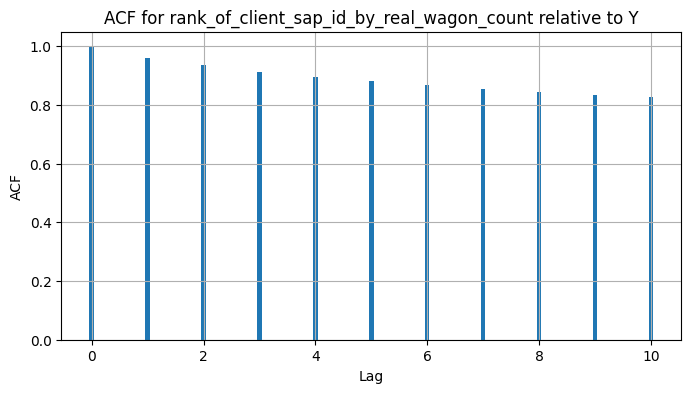

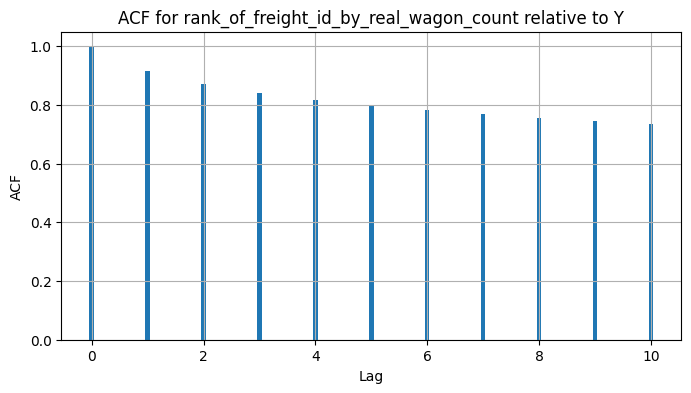

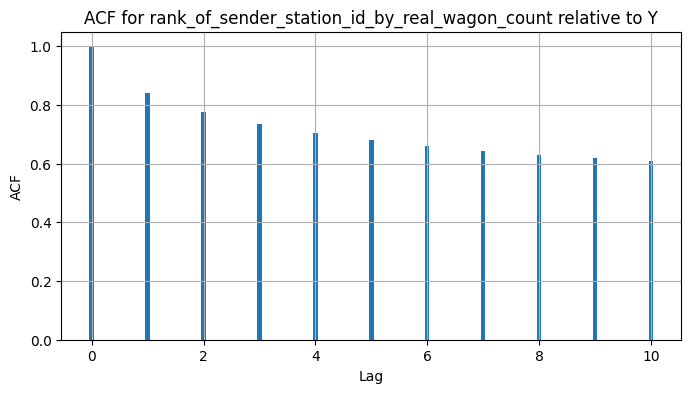

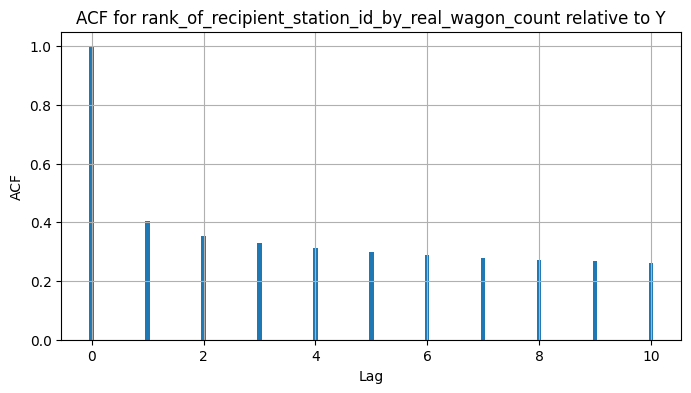

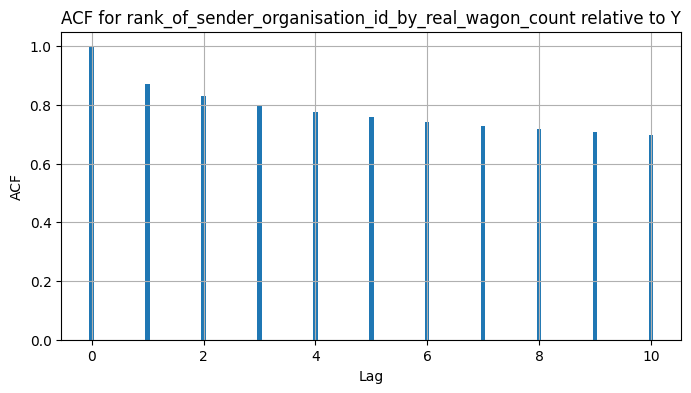

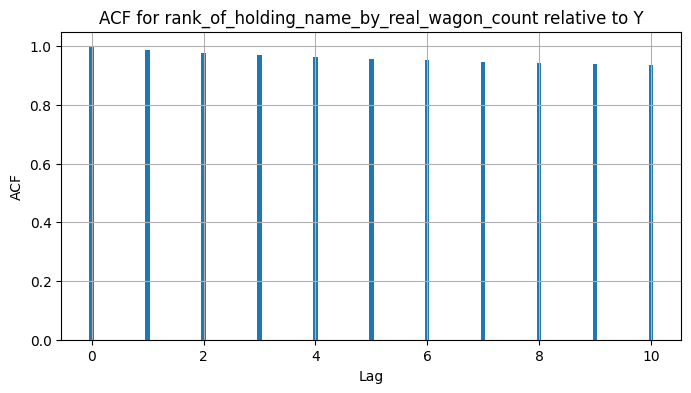

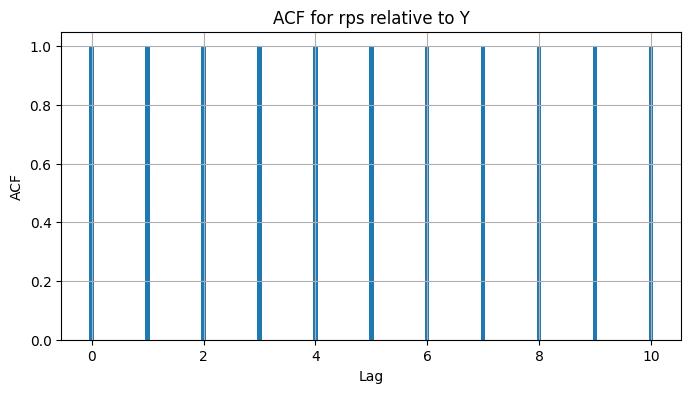

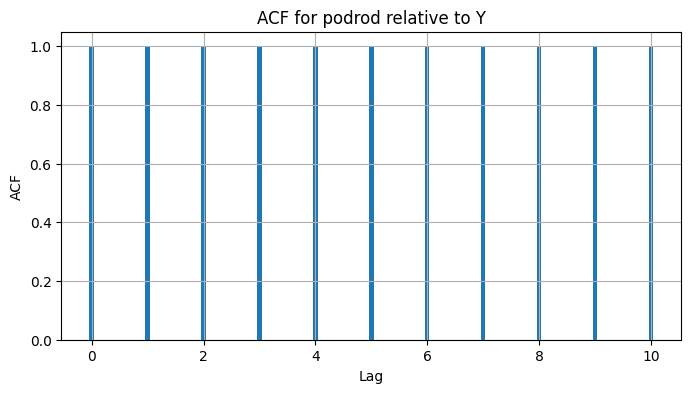

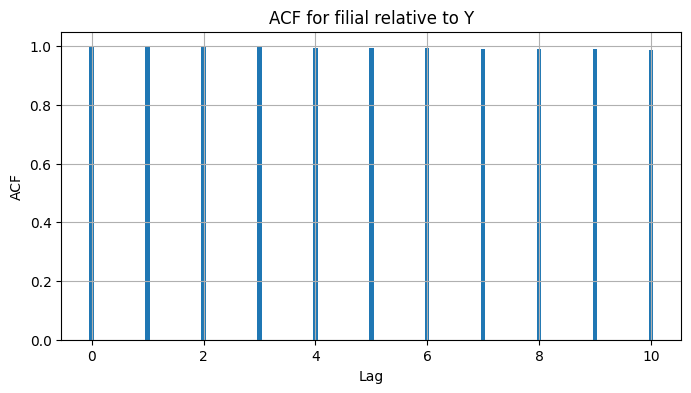

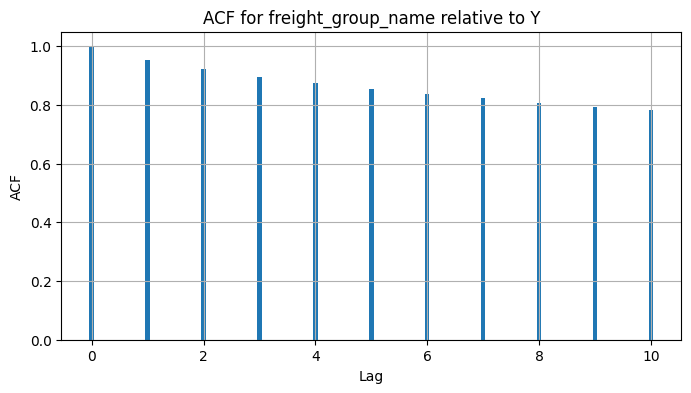

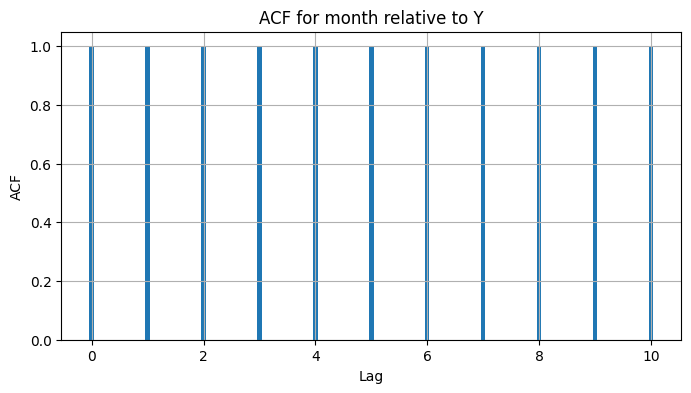

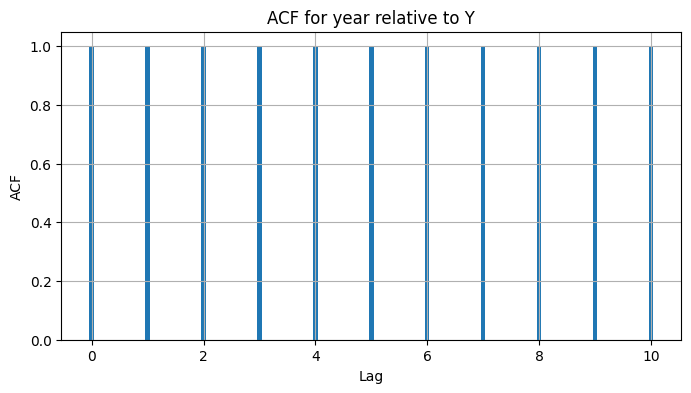

In [ ]:
def plot_acf(acf_result, column_name):
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(acf_result)), acf_result, width=0.08)
    plt.title(f'ACF for {column_name} relative to Y')
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.grid(True)
    plt.show()

for column, result in acf_results.items():
    plot_acf(result, column)

In [ ]:
X

,rank_of_client_sap_id_by_real_wagon_count,rank_of_freight_id_by_real_wagon_count,rank_of_sender_station_id_by_real_wagon_count,rank_of_recipient_station_id_by_real_wagon_count,rank_of_sender_organisation_id_by_real_wagon_count,rank_of_holding_name_by_real_wagon_count,rps,podrod,filial,freight_group_name,month,year,real_wagon_count
0,923,1271,947,2984,4870,851.0,1,5,1,21,7,2012,1
1,923,1271,947,3135,4870,851.0,1,5,1,21,10,2012,3
2,923,745,947,2667,4870,851.0,0,1,1,30,3,2014,1
3,923,745,947,2036,4870,851.0,0,1,1,30,3,2014,1
4,923,745,947,1203,4870,851.0,0,2,1,30,3,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559227,806,774,624,1206,3853,739.0,1,5,2,22,3,2023,1
3559228,806,1042,624,2693,1299,739.0,1,5,2,22,3,2023,1
3559229,806,1042,624,904,1299,739.0,1,5,2,22,3,2023,1
3559230,806,1042,624,1206,3853,739.0,1,5,2,22,3,2023,3


In [ ]:
data_subsets = set()

main_columns = [
    'rps', 'podrod',
    'filial', 'client_sap_id', 'freight_id',
    'sender_station_id', 'recipient_station_id'
]

# fact_wagon_count -> freight_id -> client_sap_id -> filial -> sender_station_id -> recipient_station
              # -> rps``````````-> podrod``````````

In [ ]:
fact_train_test

,period,rps,podrod,filial,client_sap_id,freight_id,sender_station_id,recipient_station_id,sender_organisation_id,real_weight,...,holding_name,freight_group_name,month,year,rank_of_client_sap_id_by_real_wagon_count,rank_of_freight_id_by_real_wagon_count,rank_of_sender_station_id_by_real_wagon_count,rank_of_recipient_station_id_by_real_wagon_count,rank_of_sender_organisation_id_by_real_wagon_count,rank_of_holding_name_by_real_wagon_count
0,2012-07-01,1,5,1,328,1193,30252,13005,10036,71.0,...,1423.0,21,7,2012,923,1271,947,2984,4870,851.0
1,2012-10-01,1,5,1,328,1193,30252,11376,10036,210.0,...,1423.0,21,10,2012,923,1271,947,3135,4870,851.0
2,2014-03-01,0,1,1,328,3472,30252,29548,10036,67.0,...,1423.0,30,3,2014,923,745,947,2667,4870,851.0
3,2014-03-01,0,1,1,328,3472,30252,29158,10036,67.0,...,1423.0,30,3,2014,923,745,947,2036,4870,851.0
4,2014-03-01,0,2,1,328,3472,30252,27484,10036,66.0,...,1423.0,30,3,2014,923,745,947,1203,4870,851.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559227,2023-03-01,1,5,2,1346,1482,31438,31482,0,69.0,...,2226.0,22,3,2023,806,774,624,1206,3853,739.0
3559228,2023-03-01,1,5,2,1346,1492,31438,36091,27275,70.0,...,2226.0,22,3,2023,806,1042,624,2693,1299,739.0
3559229,2023-03-01,1,5,2,1346,1492,31438,35450,27275,70.0,...,2226.0,22,3,2023,806,1042,624,904,1299,739.0
3559230,2023-03-01,1,5,2,1346,1492,31438,31482,0,207.0,...,2226.0,22,3,2023,806,1042,624,1206,3853,739.0


In [ ]:
import statsmodels.api as sm


def create_model(df : pd.DataFrame, feature_name : str, target_name : str):
    dummy_t = pd.get_dummies(df[target_name], target_name)
    grouped = pd.merge(df, dummy_t, left_index=True, right_index=True)

    grouped = grouped.groupby(['year', 'month', feature_name], as_index=False)[dummy_t.columns].mean()

    # dummy_f = pd.get_dummies(df[feature_name], feature_name)
    # df = pd.merge(df[['year', 'month', feature_name]], dummy_f, left_index=True, right_index=True)
    # grouped = pd.merge(grouped, df, on=['year', 'month', feature_name])

    flist = ['year', 'month'] #+ list(dummy_f.columns)
    grouped = grouped.groupby(flist, as_index=False)[list(dummy_t.columns)].mean()

    # display(grouped)

    model = sm.tsa.ARIMA(grouped[dummy_t.columns], exog=grouped[feature_name], order=(4, 0, 1), seasonal_order=(4, 1, 0, 12))
    results = amodel.fit()

    return results

create_model(fact_train_test, 'rps', 'filial')

KeyError: 'rps'

In [ ]:
import statsmodels.api as sm


def create_model(df : pd.DataFrame, feature_name : str, target_name : str):
    dummy_t = pd.get_dummies(df[target_name], target_name)
    grouped = pd.merge(df, dummy_t, left_index=True, right_index=True)

    grouped = grouped.groupby(['year', 'month', feature_name], as_index=False)[dummy_t.columns].mean()

    # dummy_f = pd.get_dummies(df[feature_name], feature_name)
    # df = pd.merge(df[['year', 'month', feature_name]], dummy_f, left_index=True, right_index=True)
    # grouped = pd.merge(grouped, df, on=['year', 'month', feature_name])

    flist = ['year', 'month'] #+ list(dummy_f.columns)
    grouped = grouped.groupby(flist, as_index=False)[list(dummy_t.columns)].mean()

    # display(grouped)

    results = []
    for column in dummy_t.columns:
        model = sm.tsa.ARIMA(grouped[column], order=(4, 0, 1), seasonal_order=(4, 1, 0, 12))
        results.append(model.fit())

    return results

a = create_model(fact_train_test, 'period', 'freight_group_name')

/home/owner/Documents/DEV/DATA_WAGON/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/owner/Documents/DEV/DATA_WAGON/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/owner/Documents/DEV/DATA_WAGON/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/owner/Documents/DEV/DATA_WAGON/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  wa

In [ ]:
for el in a:
    print(el.summary())

                                     SARIMAX Results                                     
Dep. Variable:              freight_group_name_0   No. Observations:                   85
Model:             ARIMA(4, 0, 1)x(4, 1, [], 12)   Log Likelihood                 328.834
Date:                           Sat, 11 Nov 2023   AIC                           -637.668
Time:                                   23:30:35   BIC                           -614.764
Sample:                                        0   HQIC                          -628.540
                                            - 85                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3890      5.502      0.071      0.944     -10.395      11.173
ar.L2          0.2668      3.186      0.084

/home/owner/Documents/DEV/DATA_WAGON/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1363: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


In [ ]:
import pandas as pd
import statsmodels.api as sm

def create_arima_model(data_frame: pd.DataFrame, date_column: str, target_column: str, order=(1, 1, 1)):

    data_frame[date_column] = pd.to_datetime(data_frame[date_column])
    data_frame.set_index(date_column, inplace=True)

    model = sm.tsa.ARIMA(data_frame[target_column], order=order)
    results = model.fit()

    return results

In [ ]:
create_arima_model(fact_train_test, 'period', 'real_wagon_count')

/home/owner/Documents/DEV/DATA_WAGON/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/owner/Documents/DEV/DATA_WAGON/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/owner/Documents/DEV/DATA_WAGON/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
